# Geospatial Analysis
## Contents
* 1) Importing Data and Libraries
* 2) Data Wrangling
* 3) Data Consistency
* 4) Creating Choropleth Map
* 5) Discuss Results

## 1) Importing Data and Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [2]:
path = '/Users/calebhill/Project 6/'

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'cars_df_clean.csv'), index_col = 0)

In [4]:
df.head()

,price,brand,year,title_status,mileage,color,state,country,condition
0,6300,toyota,2008,clean vehicle,274117.0,black,new jersey,usa,10 days left
1,2899,ford,2011,clean vehicle,190552.0,silver,tennessee,usa,6 days left
2,5350,dodge,2018,clean vehicle,39590.0,silver,georgia,usa,2 days left
3,25000,ford,2014,clean vehicle,64146.0,blue,virginia,usa,22 hours left
4,27700,chevrolet,2018,clean vehicle,6654.0,red,florida,usa,22 hours left


In [5]:
%matplotlib inline

In [6]:
country_geo = os.path.join(path, 'Data', 'Prepared Data', 'geo.geojson')

In [7]:
country_geo

'/Users/calebhill/Project 6/Data/Prepared Data/geo.geojson'

In [8]:
f = open(os.path.join(path, 'Data', 'Prepared Data', 'geo.geojson'))
data = json.load(f)


In [9]:
print(type(data))

<class 'dict'>


In [10]:
df['country'].value_counts()

country
 usa       2488
 canada       7
Name: count, dtype: int64

## 2) Data Wrangling

In [11]:
df.loc[df['country'].str.contains('usa'), 'country'] = 'US'
df.loc[df['country'].str.contains('canada'), 'country'] = 'CA'

In [12]:
df['state'] = df['state'].str.title()


In [13]:
df.columns

Index(['price', 'brand', 'year', 'title_status', 'mileage', 'color', 'state',
       'country', 'condition'],
      dtype='object')

In [14]:
columns = ['price', 'year', 'mileage', 'state']

In [15]:
sub = df[columns]

In [16]:
sub.shape

(2495, 4)

In [17]:
sub.head()

,price,year,mileage,state
0,6300,2008,274117.0,New Jersey
1,2899,2011,190552.0,Tennessee
2,5350,2018,39590.0,Georgia
3,25000,2014,64146.0,Virginia
4,27700,2018,6654.0,Florida


In [18]:
type(sub)

pandas.core.frame.DataFrame

## 3) Consistency Checks

In [19]:
sub.isnull().sum()

price      0
year       0
mileage    0
state      0
dtype: int64

In [20]:
dups = sub.duplicated()

In [21]:
dups.shape

(2495,)

<Axes: xlabel='price', ylabel='Count'>

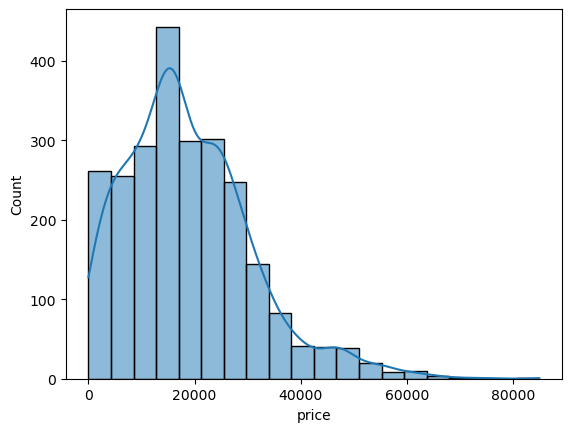

In [22]:
sns.histplot(sub['price'], bins=20, kde = True) 

<Axes: xlabel='mileage', ylabel='Count'>

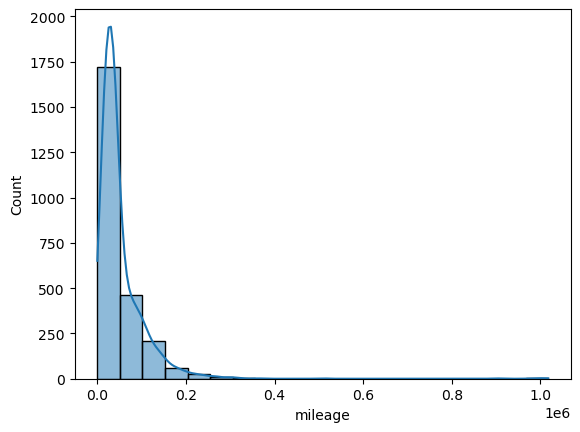

In [23]:
sns.histplot(sub['mileage'], bins=20, kde = True)

<Axes: xlabel='year', ylabel='Count'>

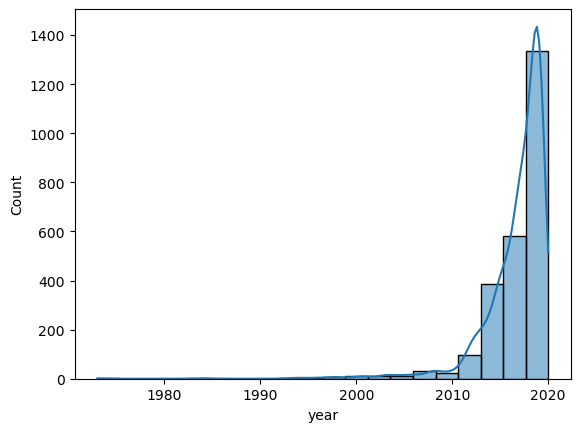

In [24]:
sns.histplot(sub['year'], bins=20, kde = True)

In [25]:
#grouping by state and finding the mean of each.
sub = sub.groupby('state', as_index = False)['price'].mean()

## 4) Creating Choropleth Map

In [26]:
# Create a data frame with just the states and the values for rating we want plotted

data_to_plot = sub[['state','price']]
data_to_plot.head()

,state,price
0,Alabama,23872.058824
1,Arizona,14709.090909
2,Arkansas,3771.666667
3,California,17836.710526
4,Colorado,13308.750000


In [27]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['state', 'price'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Price").add_to(map)
folium.LayerControl().add_to(map)

map

In [28]:
map.save(os.path.join(path, 'analysis', 'visualizations', 'plot_data.html'))

## 5) Discuss Results

It was interesting to see how getting rid of extreme values eliminated quite a few states.
This analysis doesn't answer any of my questions but some new ones I've thought of are below:

* Which states/provinces have the highest activity?
* Which states/provinces bring in the most money?